In [1]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [2]:
# load dataset 
df = pd.read_csv("dataset/StudentPerformanceFactors.csv")
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.shape

(6607, 20)

In [4]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   str  
 3   Access_to_Resources         6607 non-null   str  
 4   Extracurricular_Activities  6607 non-null   str  
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   str  
 8   Internet_Access             6607 non-null   str  
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   str  
 11  Teacher_Quality             6529 non-null   str  
 12  School_Type                 6607 non-null   str  
 13  Peer_Influence              6607 non-null   str  
 14  Physical_Activity  

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='str')

In [7]:
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

In [8]:
df.isnull().sum()*100/len(df)

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               1.180566
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      1.362192
Distance_from_Home            1.014076
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

#### Filling NaN values

In [9]:
df["Teacher_Quality"] = df["Teacher_Quality"].fillna(df["Teacher_Quality"].mode()[0])
df["Parental_Education_Level"] = df["Parental_Education_Level"].fillna(
                                            df["Parental_Education_Level"].mode()[0])
df["Distance_from_Home"] = df["Distance_from_Home"].fillna(df["Distance_from_Home"].mode()[0])
df.isnull().sum()



Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# Plotting Value Counts of each column

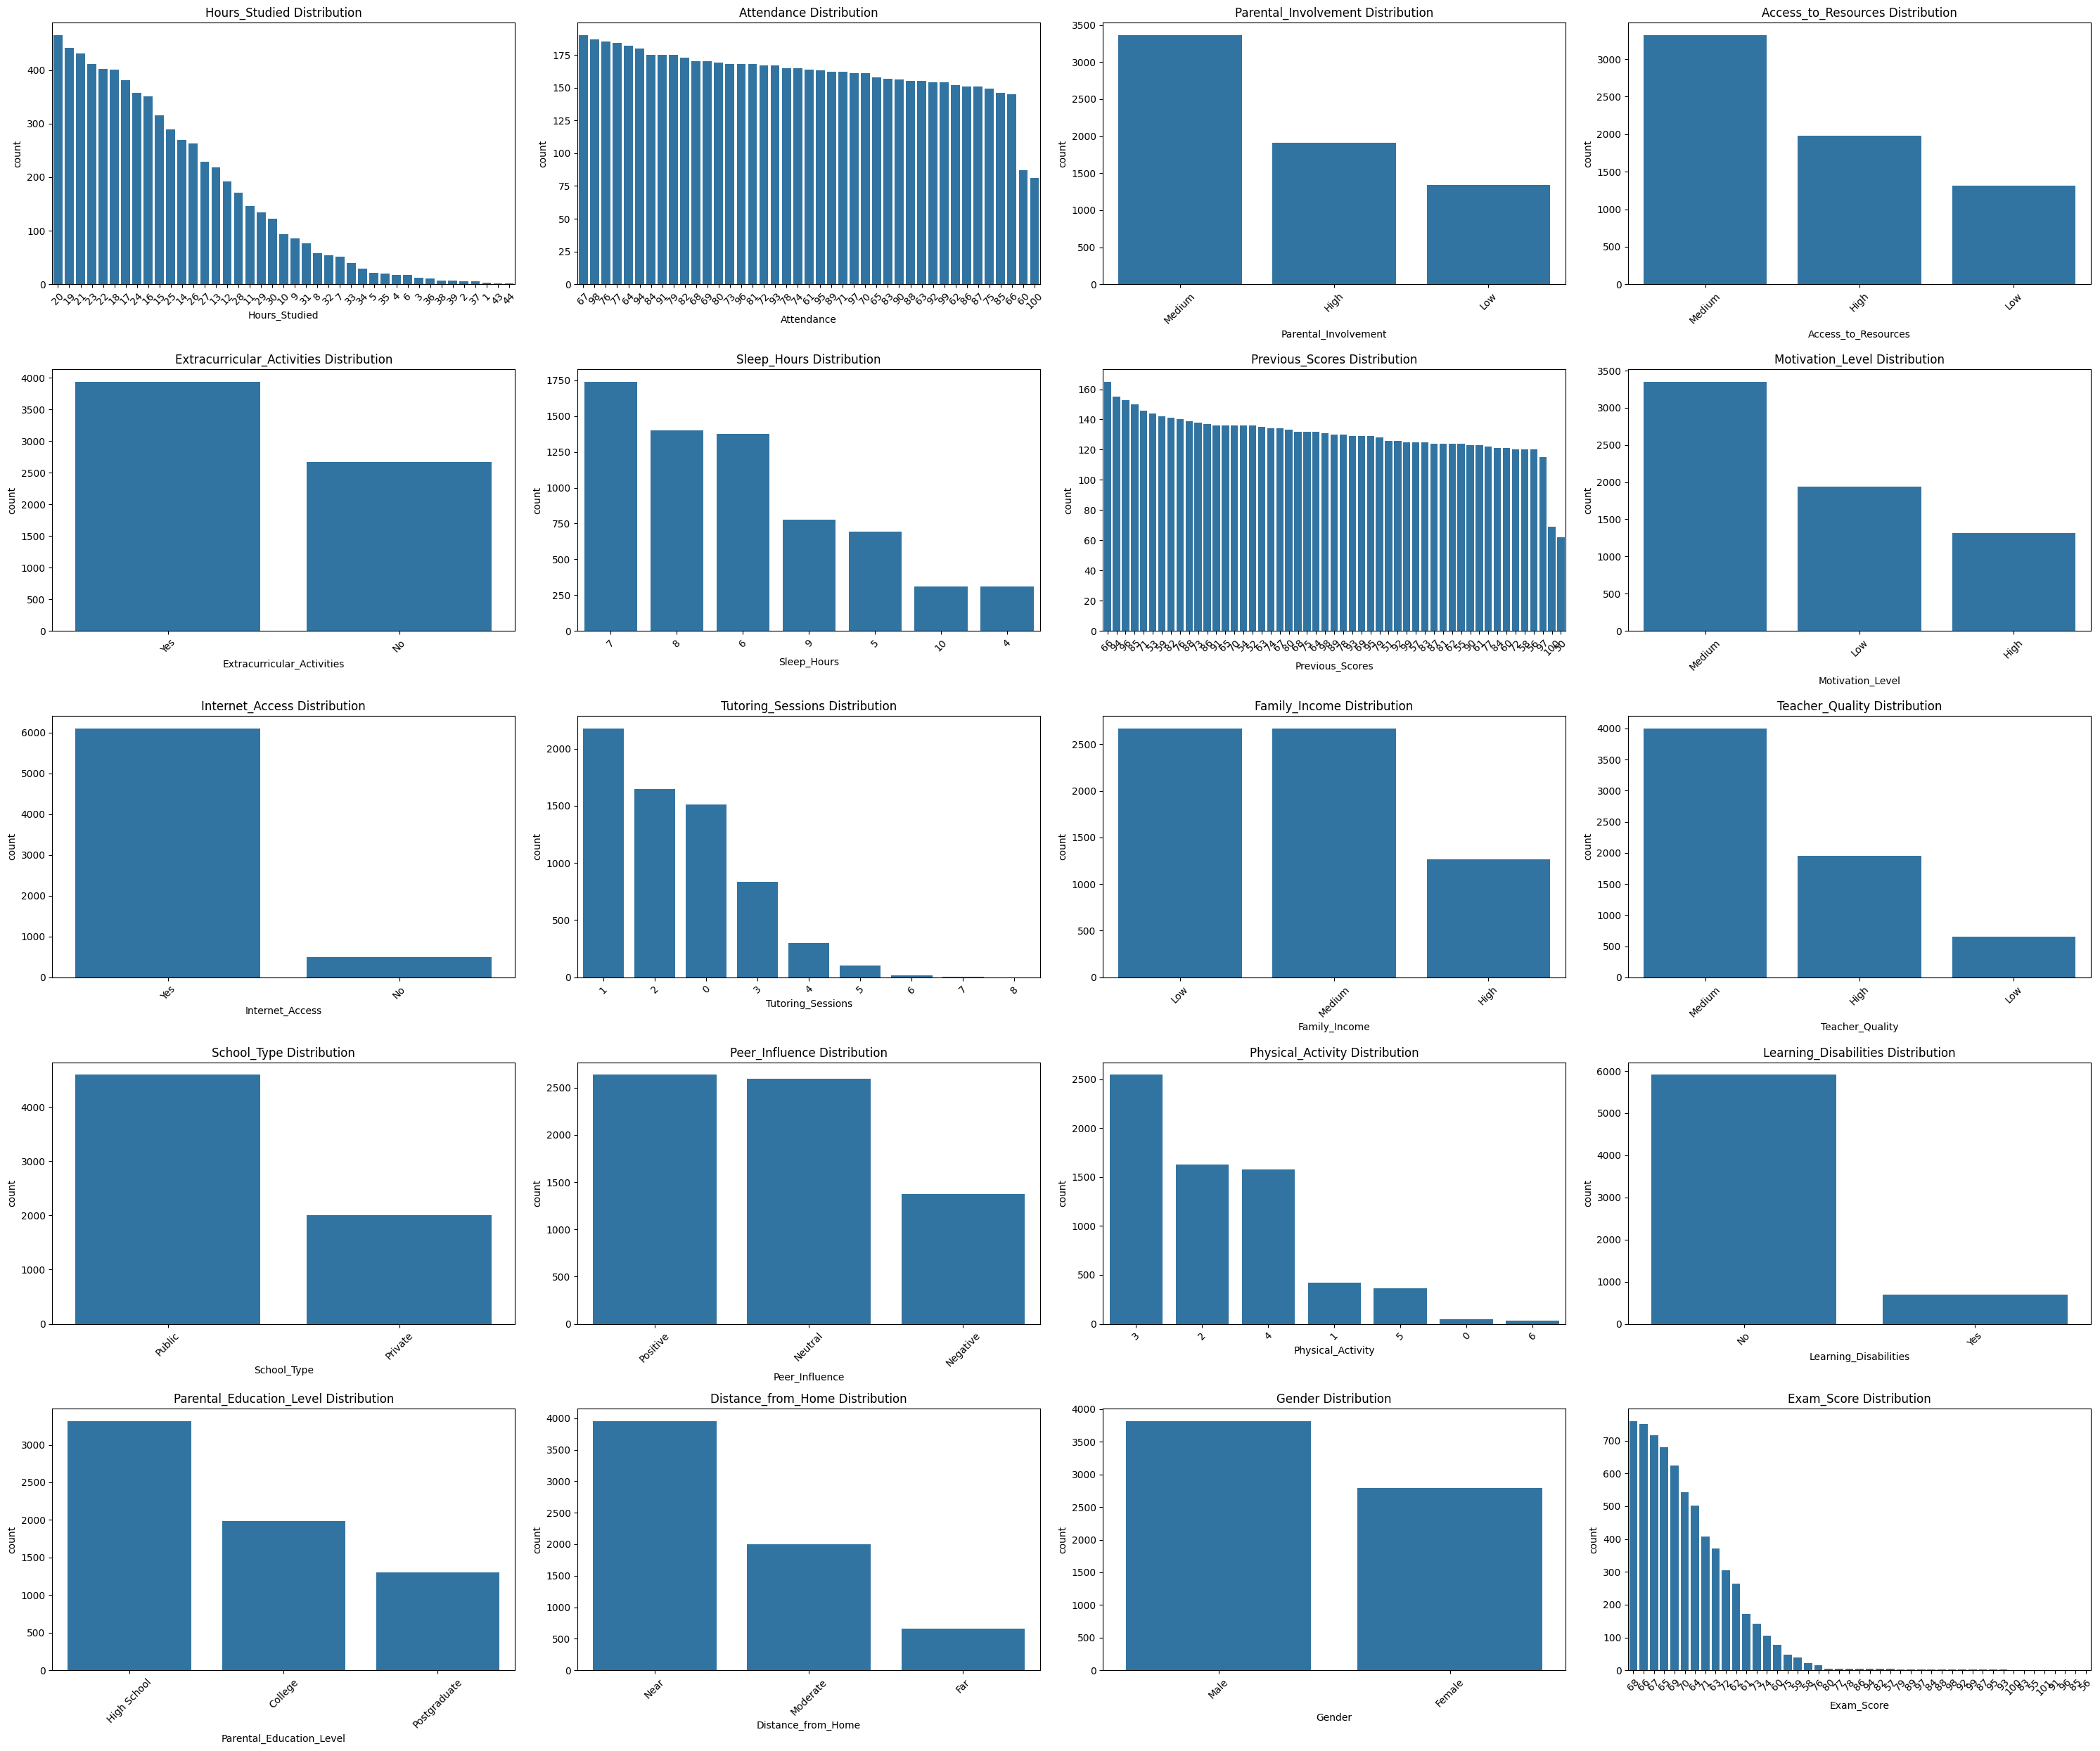

In [10]:
def plot_value_counts(df):
       columns= df.columns
       fig, axs = plt.subplots(5,4, figsize=(30, 25))
       fig.subplots_adjust(hspace=0.6, wspace=0.8)
       for ax, col in zip(axs.flat,columns):
            # Sort categories by ascending frequency
            order = df[col].value_counts().sort_values(ascending=False).index
            sns.countplot(data=df, x=col, order=order, ax=ax)
            ax.set_title(f'{col} Distribution')
            ax.tick_params(axis='x', rotation=45)
       plt.tight_layout()
       plt.show()
plot_value_counts(df)


# Exploratory Data Analysis (EDA)

## Plotting features against target

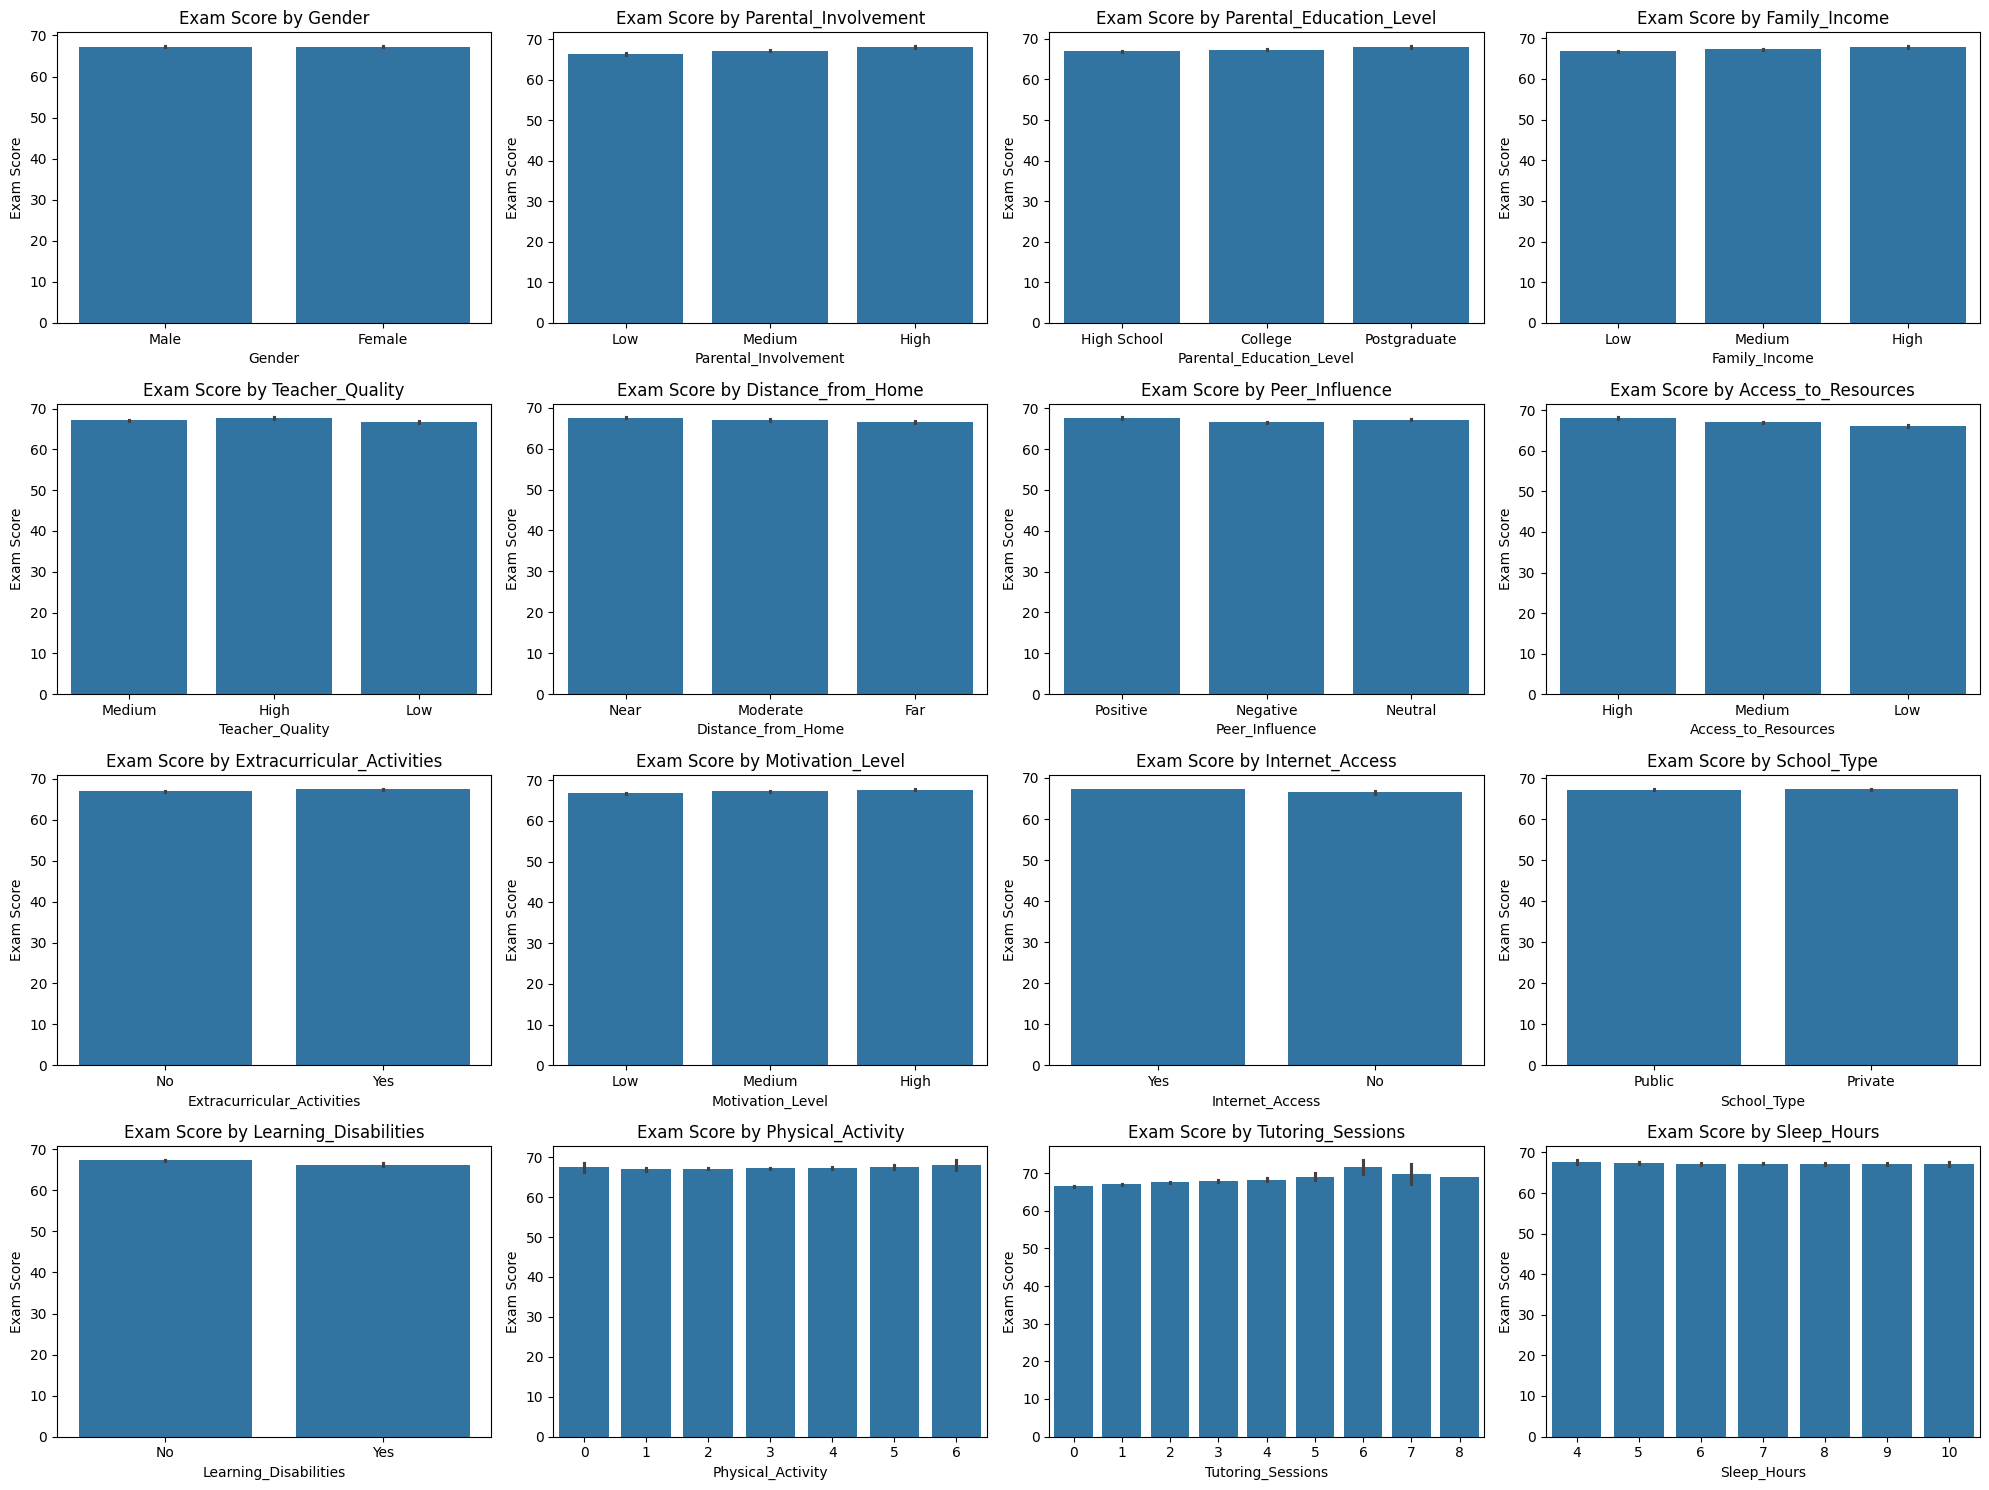

In [11]:
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
features = ["Gender","Parental_Involvement","Parental_Education_Level","Family_Income","Teacher_Quality",
            "Distance_from_Home","Peer_Influence","Access_to_Resources","Extracurricular_Activities",
            "Motivation_Level","Internet_Access","School_Type","Learning_Disabilities",
            "Physical_Activity","Tutoring_Sessions","Sleep_Hours"]
for ax, feature in zip(axs.flat, features):
    sns.barplot(data=df,y="Exam_Score",x=feature,ax=ax)
    # ax.set_xticks(np.arange(50, 105, 5))
    ax.set_title(f"Exam Score by {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Exam Score")
    # ax.set_yticks(np.arange(0, 100, 5))
plt.tight_layout()
plt.show()


#### Points From Plots
- Gender: From plot, it is evident that both male and female students performed well. 
- Parental Involvement: Students with high parental involvement tend to score higher, while low involvement is associated with lower exam scores.
- Parental Education Level: Students whose parents have higher education i.e.postgraduate slightly achieved better exam scores.
- Family Income: Higher family income is associated with slightly better academic performance compared to low income.
- Teacher Quality: Better teacher quality is slightly associated with higher student exam scores.
- Distance from Home: Students living closer to school tend to perform better than those living farther away.
- Peer Influence: Positive peer influence is linked to higher exam scores, while negative peer influence relates to lower performance.
- Access to Resources: Students with high access to resources tend to score higher, while those with low access generally have lower exam scores.
- Extracurricular Activities: Students who participate in extracurricular activities show slightly better exam performance compared to those who do not.
- Motivation Level: Higher motivation levels are associated with higher exam scores, while low motivation relates to lower performance.
- Internet Access: Students with internet access tend to perform better than those without access.
- School Type: Private school students appear to have slightly higher exam scores compared to public school students.
- Learning Disabilities:There is a noticeable left shift for students with learning disabilities, showing a moderate-to-strong effect.


## Visualize count of each category of features

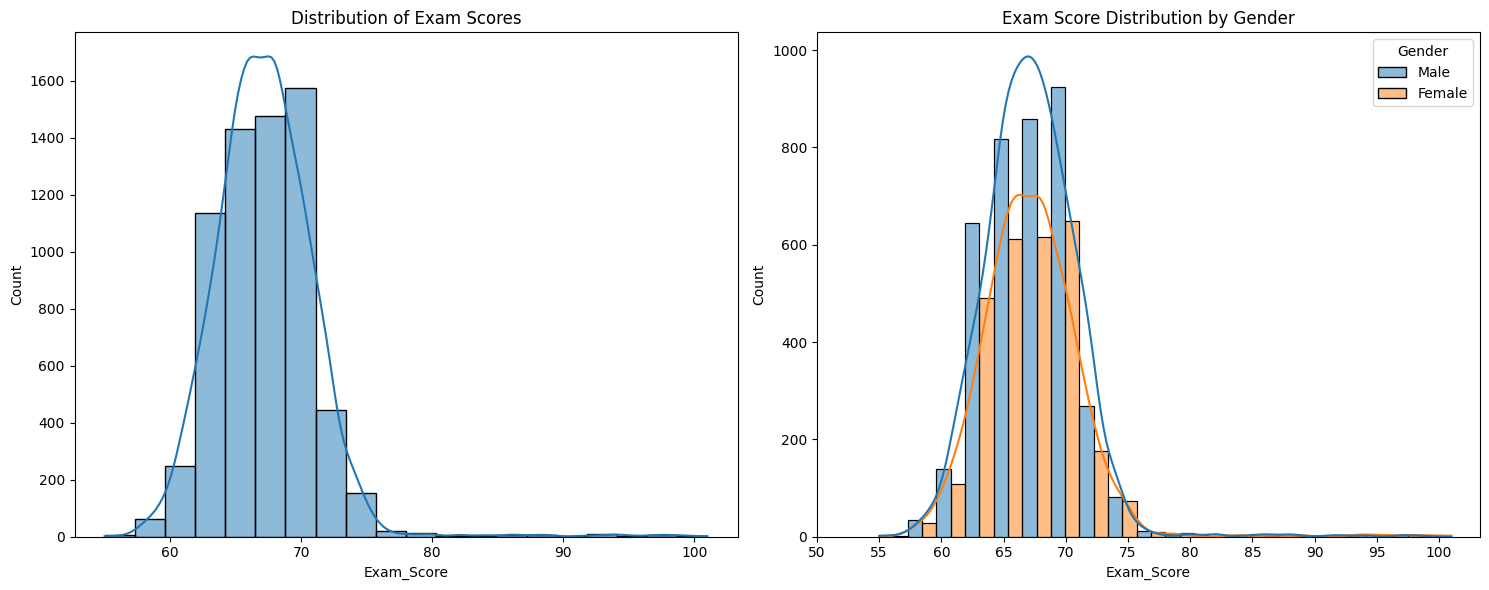

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15,6))
sns.histplot(data=df,x="Exam_Score",kde=True, bins=20,ax=axs[0])
axs[0].set_title("Distribution of Exam Scores")
sns.histplot(data=df,x="Exam_Score",kde=True,hue="Gender",multiple="dodge", bins=20,ax=axs[1])
axs[1].set_title("Exam Score Distribution by Gender")
axs[1].set_xticks(np.arange(50, 105, 5))
plt.tight_layout()
plt.show()

- From the plot 2 , it can be observed that male students are more frequently represented in the higher exam score ranges than female students.

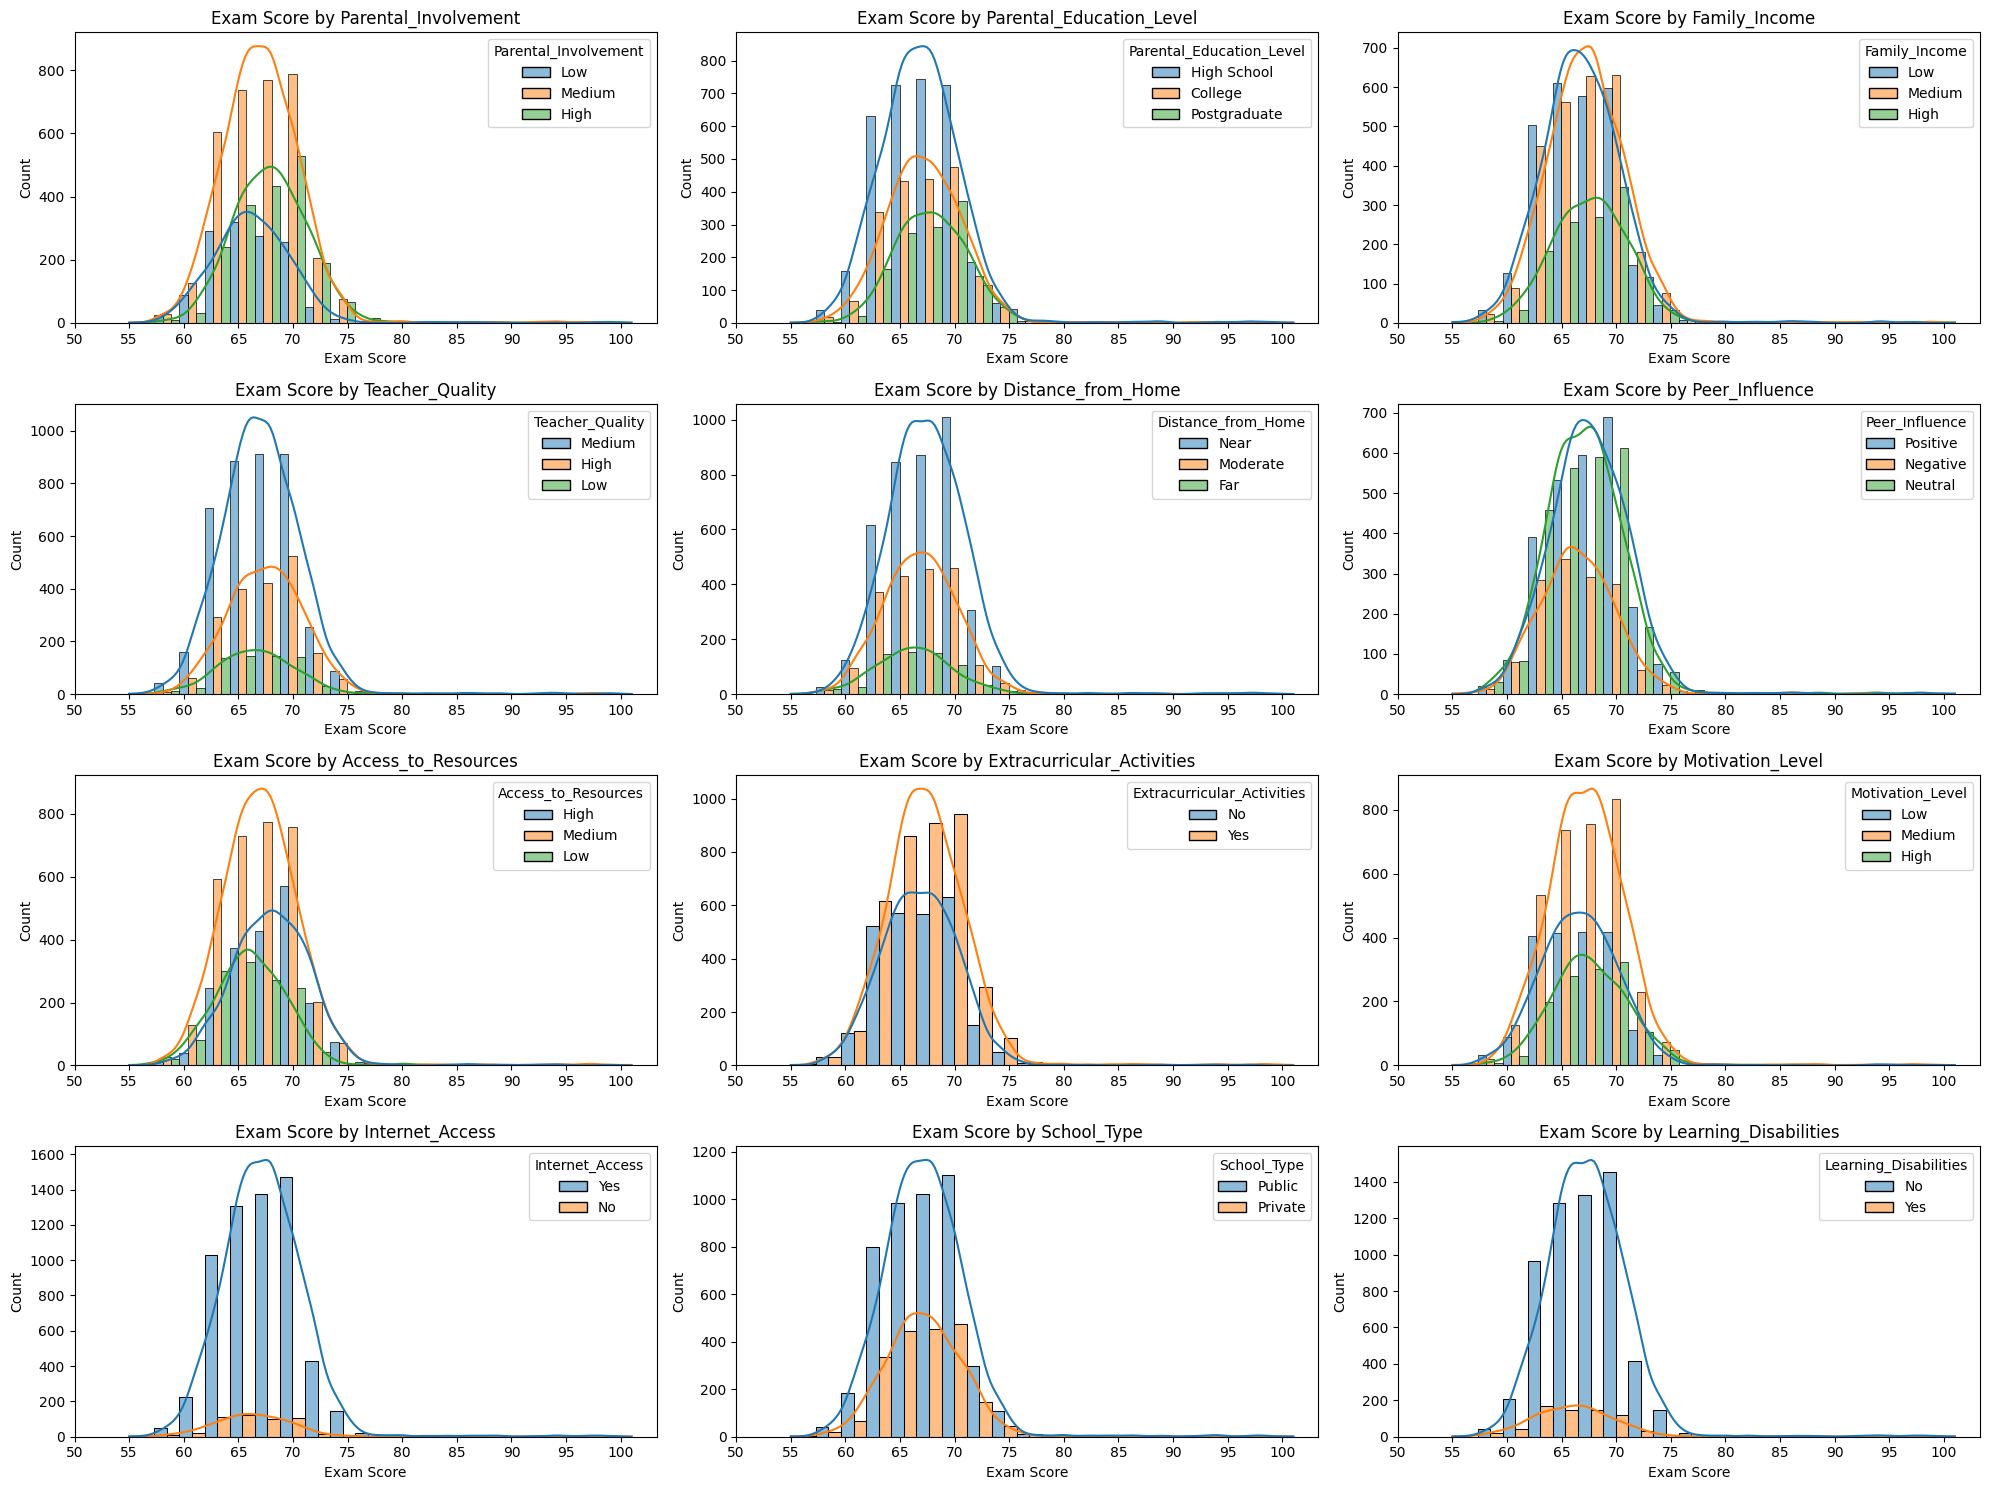

In [13]:
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
features = ["Parental_Involvement","Parental_Education_Level","Family_Income","Teacher_Quality",
            "Distance_from_Home","Peer_Influence","Access_to_Resources","Extracurricular_Activities",
            "Motivation_Level","Internet_Access","School_Type","Learning_Disabilities"]
for ax, feature in zip(axs.flat, features):
    sns.histplot(data=df,x="Exam_Score",hue=feature,multiple="dodge",bins=20,kde=True,ax=ax)
    ax.set_xticks(np.arange(50, 105, 5))
    ax.set_title(f"Exam Score by {feature}")
    ax.set_xlabel("Exam Score")
    ax.set_ylabel("Count")
plt.tight_layout()
plt.show()


# Visualize Relationship between features and target varaiable

In [14]:
df["Physical_Activity"] = df["Physical_Activity"].astype(int)


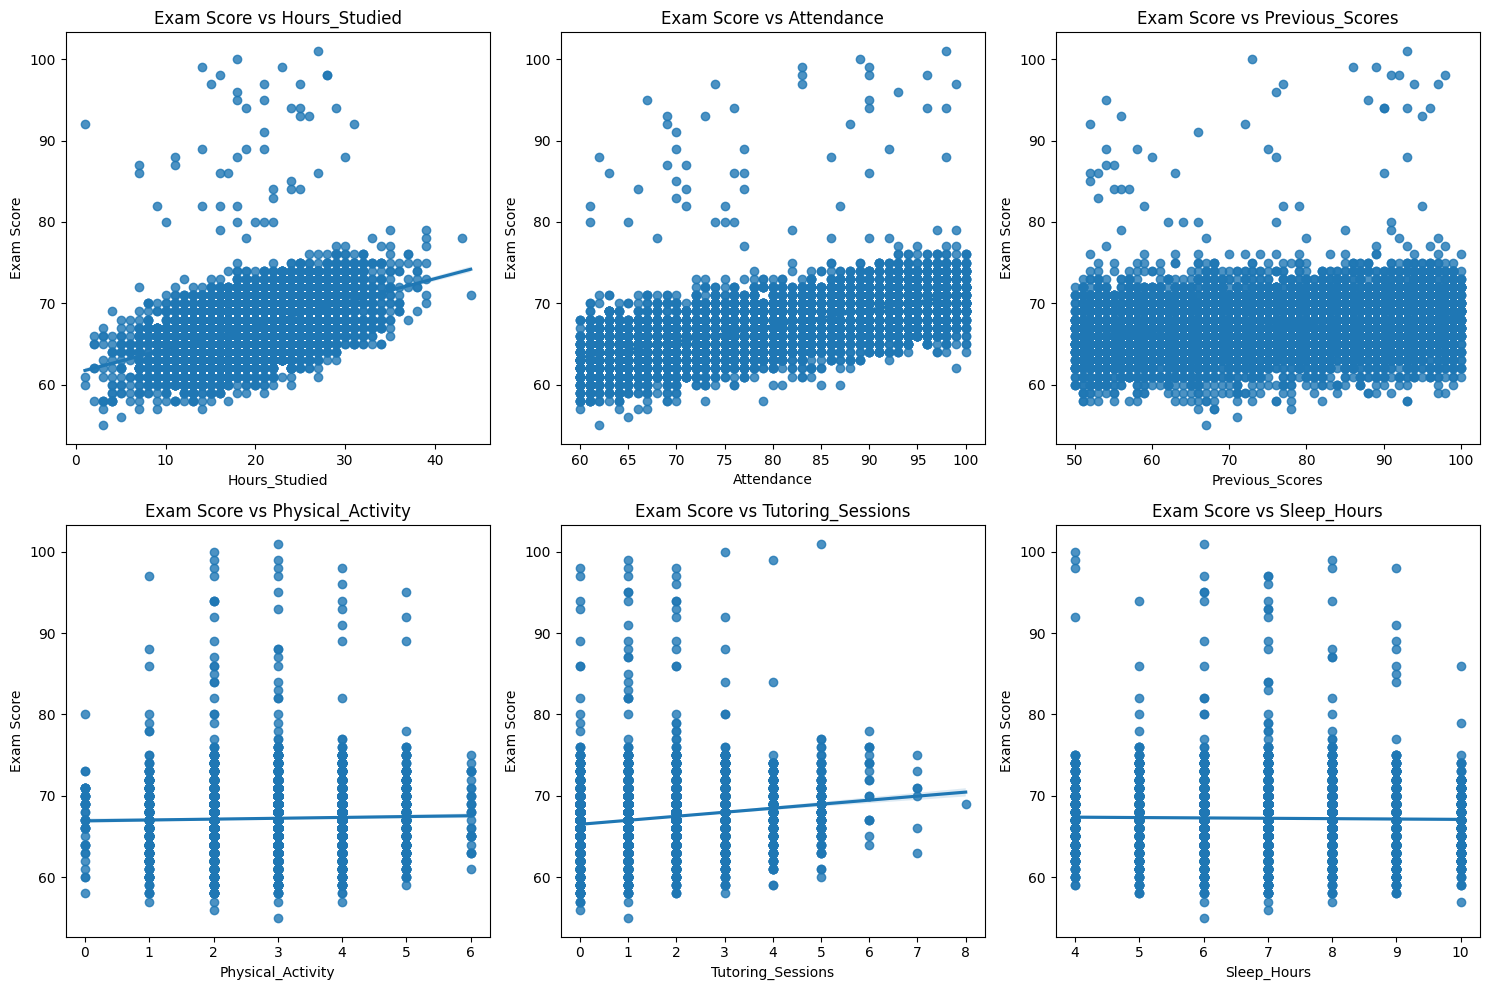

In [15]:
fig, axs= plt.subplots(2,3,figsize=(15,10))
features = ["Hours_Studied","Attendance","Previous_Scores","Physical_Activity","Tutoring_Sessions","Sleep_Hours"]
for ax, feature in zip(axs.flat, features):
     sns.regplot(data=df, y="Exam_Score", x= feature, ax=ax)
     ax.set_title(f"Exam Score vs {feature}")
     ax.set_xlabel(feature)
     ax.set_ylabel("Exam Score")
plt.tight_layout()
plt.show()




- These plots show that "Attendace" & "Hour_Studied" have a moderate positive correlation while "Previous Scores" has a very weak correlation with Exam score.

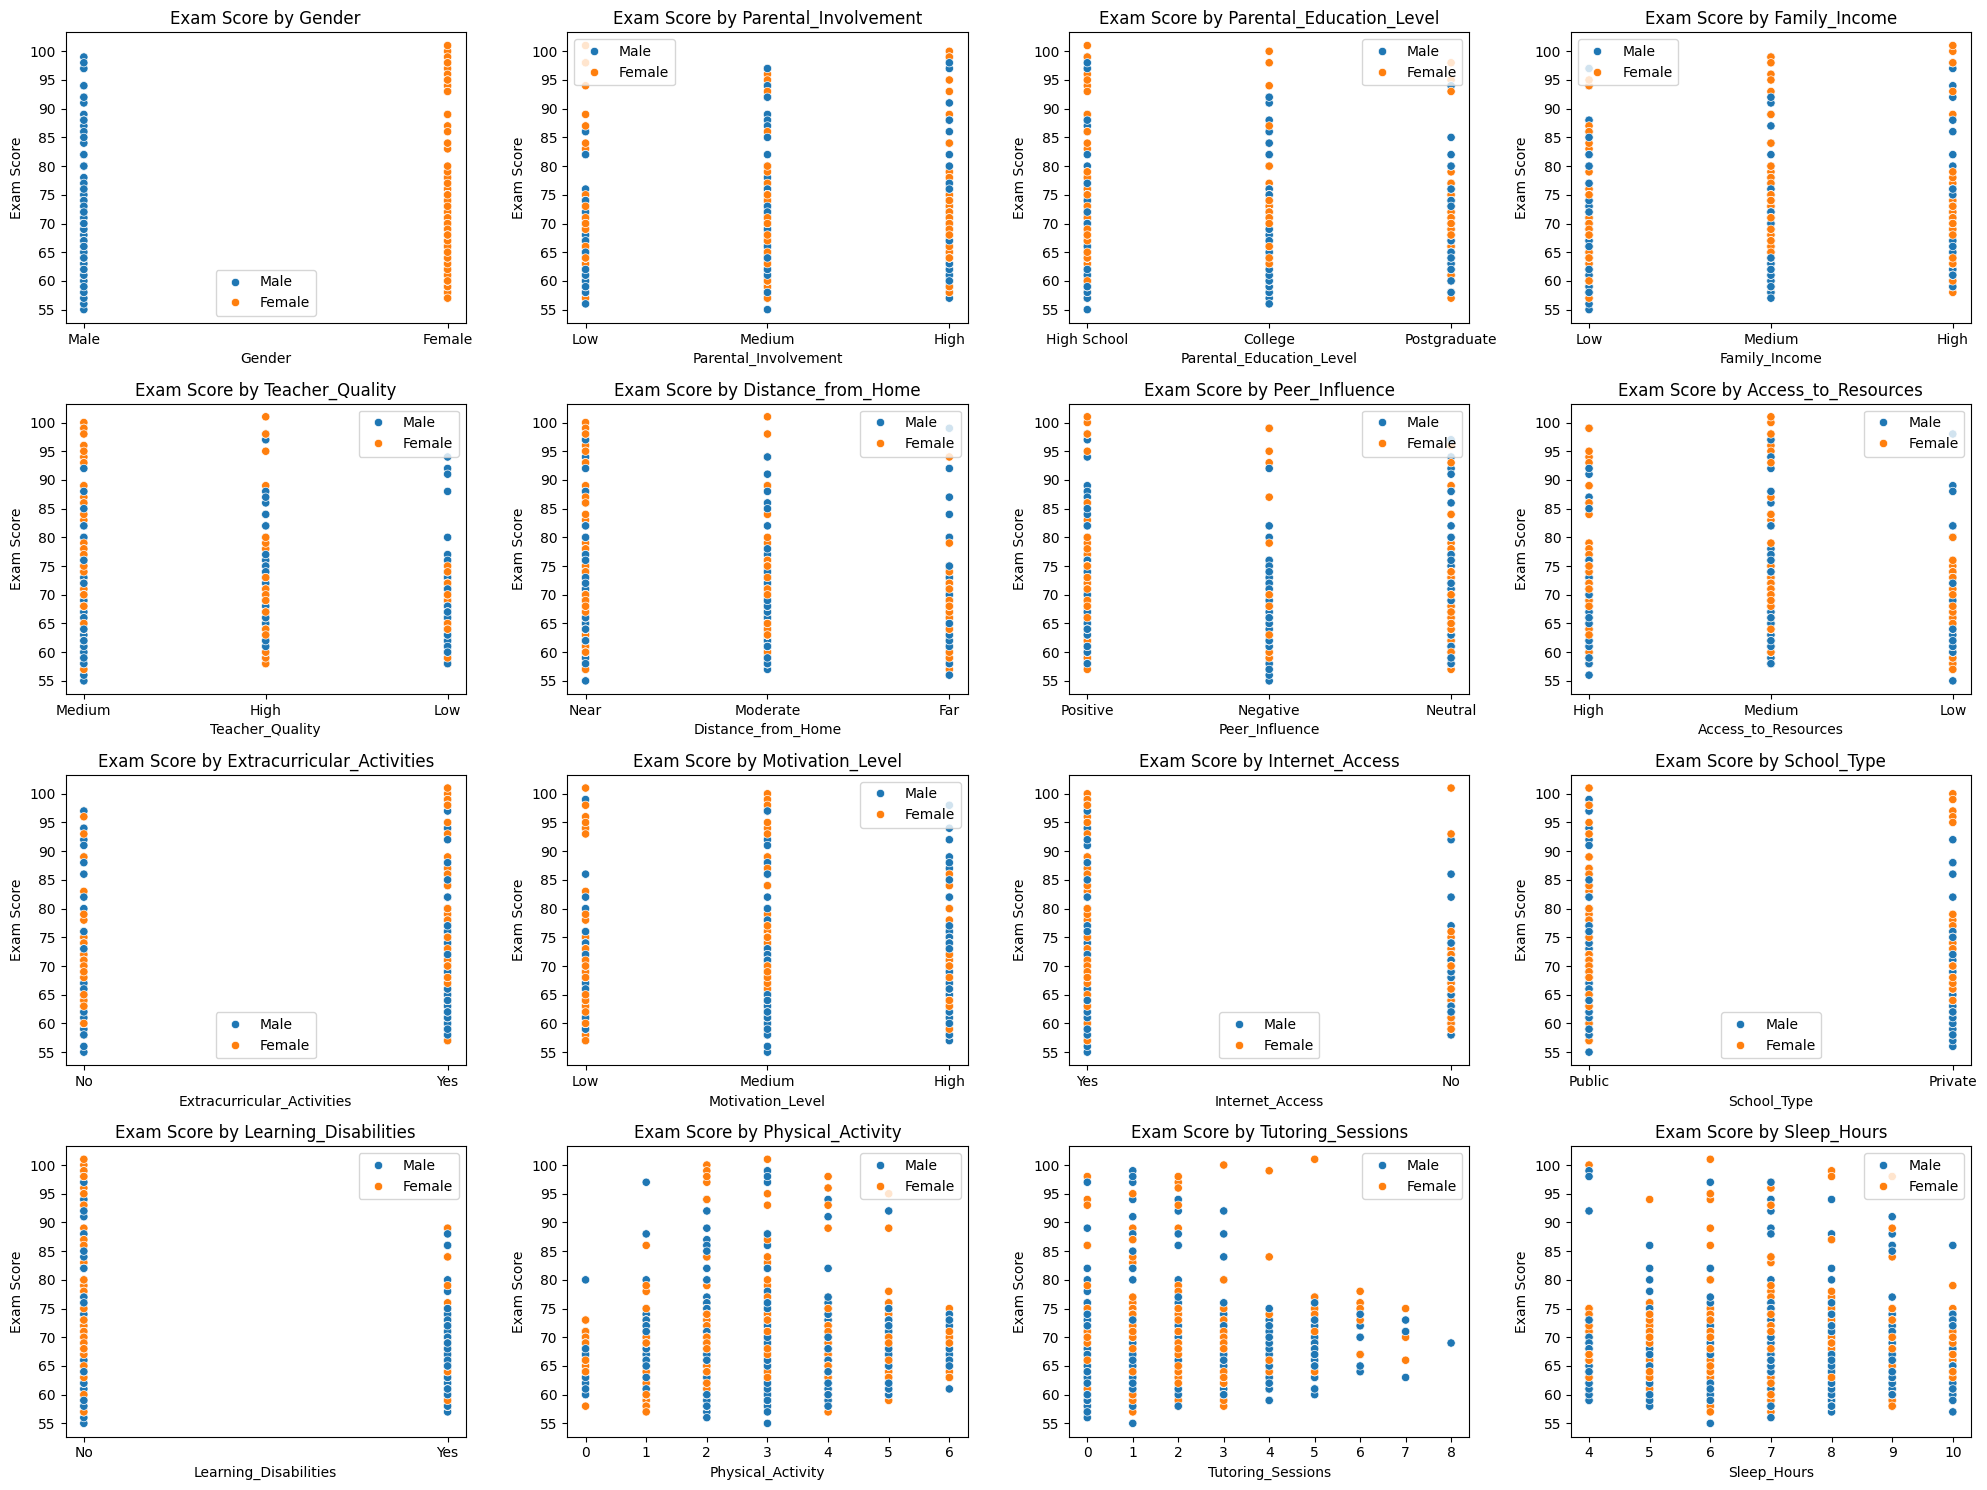

In [16]:
fig, axs = plt.subplots(4, 4, figsize=(20, 15))
features = ["Gender","Parental_Involvement","Parental_Education_Level","Family_Income","Teacher_Quality",
            "Distance_from_Home","Peer_Influence","Access_to_Resources","Extracurricular_Activities",
            "Motivation_Level","Internet_Access","School_Type","Learning_Disabilities",
            "Physical_Activity","Tutoring_Sessions","Sleep_Hours"]
for ax, feature in zip(axs.flat, features):
    sns.scatterplot(data=df,y="Exam_Score",x=feature,hue="Gender",ax=ax)
    ax.set_title(f"Exam Score by {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Exam Score")
    ax.legend(loc="best")
    ax.set_yticks(np.arange(55,105, 5))
plt.tight_layout()
plt.show()

# Correlation between features and target variable

In [17]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.corr()["Exam_Score"].sort_values(ascending=False)

Exam_Score                               1.000000
Attendance                               0.581072
Hours_Studied                            0.445455
Previous_Scores                          0.175079
Tutoring_Sessions                        0.156525
Parental_Education_Level_Postgraduate    0.093764
Peer_Influence_Positive                  0.081217
Distance_from_Home_Near                  0.080933
Extracurricular_Activities_Yes           0.064382
Internet_Access_Yes                      0.051475
Physical_Activity                        0.027824
Motivation_Level_Medium                  0.024771
Family_Income_Medium                     0.020995
Gender_Male                             -0.002032
Peer_Influence_Neutral                  -0.007795
School_Type_Public                      -0.008844
Sleep_Hours                             -0.017022
Access_to_Resources_Medium              -0.026158
Parental_Involvement_Medium             -0.035978
Teacher_Quality_Low                     -0.041192


# Model Training

#### Model 1 ("Hours_Studied")

MAE: 2.4475687452945643
MSE: 10.85592128879332
RMSE: 3.294832513010839
R2 Score: 0.2319868674542106


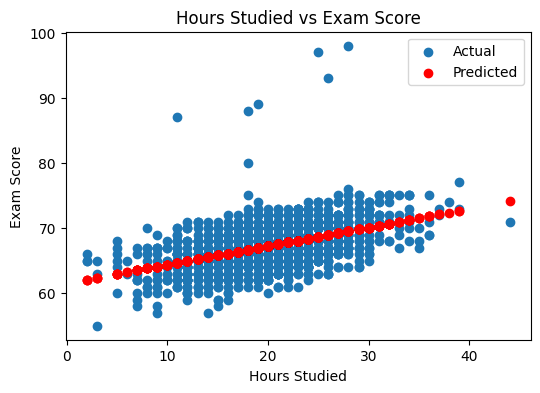

In [18]:
## Basic Model (Single Feature)
X = df[["Hours_Studied"]]
y = df["Exam_Score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
mae_model1 = mean_absolute_error(y_test, y_pred)
mse_model1 = mean_squared_error(y_test, y_pred)
rmse_model1 = np.sqrt(mse_model1)
r2_model1 = r2_score(y_test, y_pred)
# Print results
print("MAE:", mae_model1)
print("MSE:", mse_model1)
print("RMSE:", rmse_model1)
print("R2 Score:", r2_model1)
#plot actual vs predicted result
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label="Actual")
plt.scatter(X_test, y_pred, color='red', label="Predicted")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.title("Hours Studied vs Exam Score")
plt.show()


#### Model 1 ("Hours_Studied" + "Polynomial")

Polynomial R2: 0.23276034442853466
Polynomial MAE: 2.4447795821288105
Polynomial MSE: 10.84498813570501
Polynomial RMSE: 3.2931729586684346


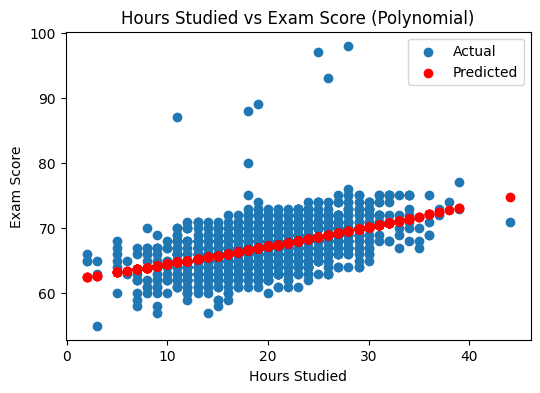

In [19]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)
model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)
y_pred_poly = model_poly.predict(X_test_p)
# Print results
r2_poly = r2_score(y_test_p, y_pred_poly)
mae_poly = mean_absolute_error(y_test_p, y_pred_poly)
mse_poly = mean_squared_error(y_test_p, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
print("Polynomial R2:",r2_poly )
print("Polynomial MAE:",mae_poly )
print("Polynomial MSE:",mse_poly )
print("Polynomial RMSE:",rmse_poly )
#plot actual vs predicted result
plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test_p, label="Actual")
plt.scatter(X_test, y_pred_poly, color='red', label="Predicted")

plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.legend()
plt.title("Hours Studied vs Exam Score (Polynomial)")
plt.show()

#### Model 2 ("Hours_Studied" + "Attendance")

Model 2 MAE: 1.4689640272451197
Model 2 MSE: 5.809117224063618
Model 2 RMSE: 2.41021103309723
Model 2 R²: 0.589028125951463


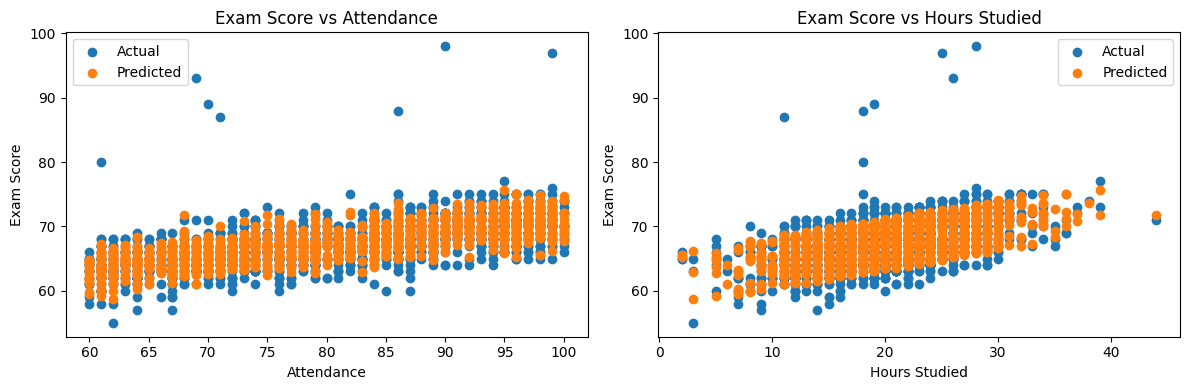

In [20]:
# Features
X2 = df[["Hours_Studied", "Attendance"]]
y = df["Exam_Score"]
# Split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
# Train
model2 = LinearRegression()
model2.fit(X2_train, y_train)
# Predict
y_pred2 = model2.predict(X2_test)
# Evaluate
r2_model2 = r2_score(y_test, y_pred2)
mae_model2 = mean_absolute_error(y_test, y_pred2)
mse_model2 = mean_squared_error(y_test, y_pred2)
rmse_model2 = np.sqrt(mse_model2)
# Print results
print("Model 2 MAE:", mae_model2)
print("Model 2 MSE:", mse_model2)
print("Model 2 RMSE:", rmse_model2)
print("Model 2 R²:", r2_model2)
#plot actual vs predicted result
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1: Attendance
axs[0].scatter(X2_test["Attendance"], y_test, label="Actual")
axs[0].scatter(X2_test["Attendance"], y_pred2, label="Predicted")
axs[0].set_xlabel("Attendance")
axs[0].set_ylabel("Exam Score")
axs[0].set_title("Exam Score vs Attendance")
axs[0].legend()
# Plot 2: Hours Studied
axs[1].scatter(X2_test["Hours_Studied"], y_test, label="Actual")
axs[1].scatter(X2_test["Hours_Studied"], y_pred2, label="Predicted")
axs[1].set_xlabel("Hours Studied")
axs[1].set_ylabel("Exam Score")
axs[1].set_title("Exam Score vs Hours Studied")
axs[1].legend()
plt.tight_layout()
plt.show()




#### Model 2 ("Hours_Studied" + "Attendance" + "Polynomial")

Polynomial Model 2 MAE: 1.4672141398112224
Polynomial Model 2 MSE: 5.812159231062505
Polynomial Model 2 RMSE: 2.410842017026936
Polynomial Model 2 R²: 0.588812916089279


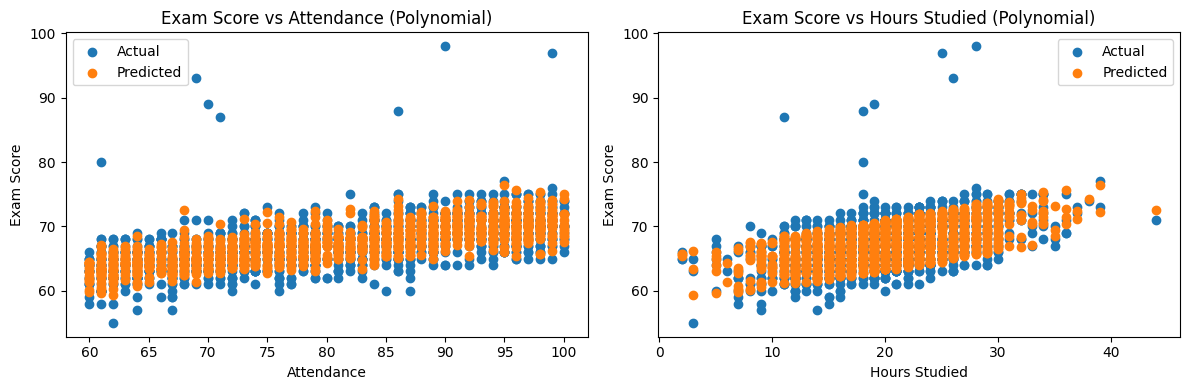

In [21]:
# Features and target
X2 = df[["Hours_Studied", "Attendance"]]
y = df["Exam_Score"]
# Split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
# Polynomial transformation (degree 2 is common, can increase if needed)
poly = PolynomialFeatures(degree=2, include_bias=False)
X2_train_poly = poly.fit_transform(X2_train)
X2_test_poly = poly.transform(X2_test)
# Train polynomial regression
model2_poly = LinearRegression()
model2_poly.fit(X2_train_poly, y_train)
# Predict
y_pred2_poly = model2_poly.predict(X2_test_poly)
# Evaluate
r2_model2_poly = r2_score(y_test, y_pred2_poly)
mae_model2_poly = mean_absolute_error(y_test, y_pred2_poly)
mse_model2_poly = mean_squared_error(y_test, y_pred2_poly)
rmse_model2_poly = np.sqrt(mse_model2_poly)
# Print results
print("Polynomial Model 2 MAE:", mae_model2_poly)
print("Polynomial Model 2 MSE:", mse_model2_poly)
print("Polynomial Model 2 RMSE:", rmse_model2_poly)
print("Polynomial Model 2 R²:", r2_model2_poly)
# Plot actual vs predicted
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
# Plot 1: Attendance
axs[0].scatter(X2_test["Attendance"], y_test, label="Actual")
axs[0].scatter(X2_test["Attendance"], y_pred2_poly, label="Predicted")
axs[0].set_xlabel("Attendance")
axs[0].set_ylabel("Exam Score")
axs[0].set_title("Exam Score vs Attendance (Polynomial)")
axs[0].legend()
# Plot 2: Hours Studied
axs[1].scatter(X2_test["Hours_Studied"], y_test, label="Actual")
axs[1].scatter(X2_test["Hours_Studied"], y_pred2_poly, label="Predicted")
axs[1].set_xlabel("Hours Studied")
axs[1].set_ylabel("Exam Score")
axs[1].set_title("Exam Score vs Hours Studied (Polynomial)")
axs[1].legend()
plt.tight_layout()
plt.show()


#### Model 3 ("Hours_Studied" + "Attendance" + "Previous_Scores")

Model 3 MAE: 1.3592073185897005
Model 3 RMSE: 2.3104706093257077
Model 3 MSE: 5.3382744365579065
Model 3 R²: 0.6223383752199567


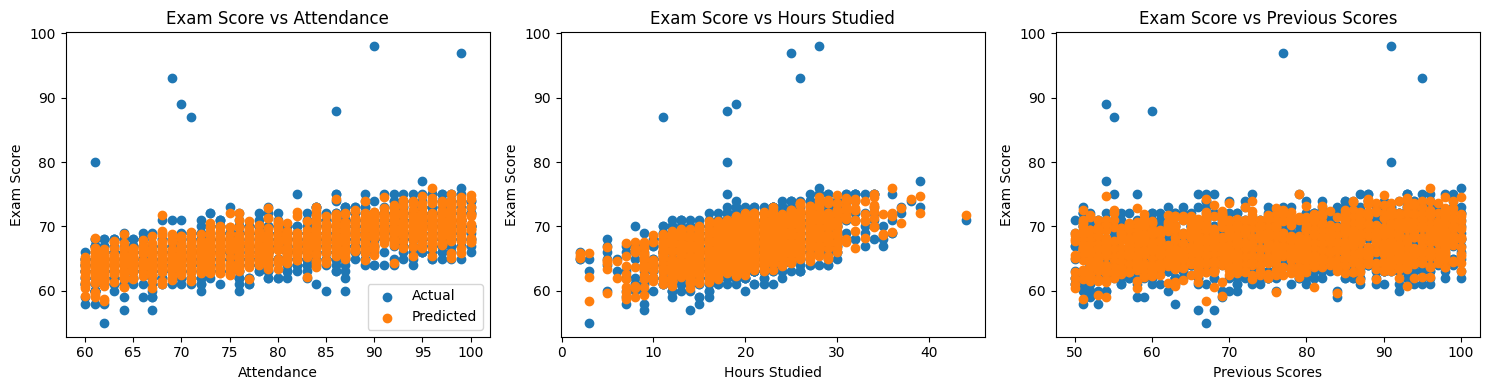

In [22]:
# Features
X3 = df[["Hours_Studied", "Attendance", "Previous_Scores"]]
# Split
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)
# Train
model3 = LinearRegression()
model3.fit(X3_train, y_train)
# Predict
y_pred3 = model3.predict(X3_test)
# Evaluate
r2_model3 = r2_score(y_test, y_pred3)
mae_model3 = mean_absolute_error(y_test, y_pred3)
mse_model3 = mean_squared_error(y_test, y_pred3)
rmse_model3 = np.sqrt(mse_model3)
# Print results
print("Model 3 MAE:", mae_model3)
print("Model 3 RMSE:", rmse_model3)
print("Model 3 MSE:", mse_model3)
print("Model 3 R²:", r2_model3)
#plot actual vs predicted result
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# Plot 1: Attendance
axs[0].scatter(X3_test["Attendance"], y_test, label="Actual")
axs[0].scatter(X3_test["Attendance"], y_pred3, label="Predicted")
axs[0].set_xlabel("Attendance")
axs[0].set_ylabel("Exam Score")
axs[0].set_title("Exam Score vs Attendance")
axs[0].legend()
# Plot 2: Hours Studied
axs[1].scatter(X3_test["Hours_Studied"], y_test, label="Actual")
axs[1].scatter(X3_test["Hours_Studied"], y_pred3, label="Predicted")
axs[1].set_xlabel("Hours Studied")
axs[1].set_ylabel("Exam Score")
axs[1].set_title("Exam Score vs Hours Studied")
# Plot 2: Previous Scores
axs[2].scatter(X3_test["Previous_Scores"], y_test, label="Actual")
axs[2].scatter(X3_test["Previous_Scores"], y_pred3, label="Predicted")
axs[2].set_xlabel("Previous Scores")
axs[2].set_ylabel("Exam Score")
axs[2].set_title("Exam Score vs Previous Scores")
plt.tight_layout()
plt.show()


#### Model 3 ("Hours_Studied" + "Attendance" + "Previous_Scores" + "Polynomial")

Polynomial Model 3 MAE: 1.3582792150387655
Polynomial Model 3 RMSE: 2.311149091257172
Polynomial Model 3 MSE: 5.341410122018853
Polynomial Model 3 R²: 0.6221165379802168


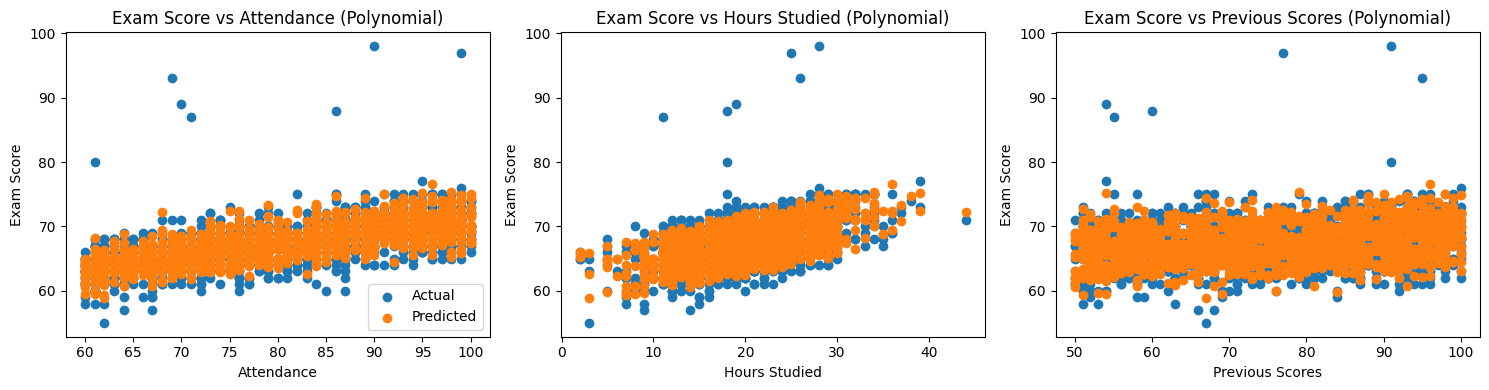

In [23]:
# Features
X3 = df[["Hours_Studied", "Attendance", "Previous_Scores"]]

# Split
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

# Polynomial Transformation 
poly = PolynomialFeatures(degree=2, include_bias=False)
X3_train_poly = poly.fit_transform(X3_train)
X3_test_poly = poly.transform(X3_test)

# Train Polynomial Regression
model3_poly = LinearRegression()
model3_poly.fit(X3_train_poly, y_train)

# Predict
y_pred3_poly = model3_poly.predict(X3_test_poly)

# Evaluate
r2_model3_poly = r2_score(y_test, y_pred3_poly)
mae_model3_poly = mean_absolute_error(y_test, y_pred3_poly)
mse_model3_poly = mean_squared_error(y_test, y_pred3_poly)
rmse_model3_poly = np.sqrt(mse_model3_poly)

# Print results
print("Polynomial Model 3 MAE:", mae_model3_poly)
print("Polynomial Model 3 RMSE:", rmse_model3_poly)
print("Polynomial Model 3 MSE:", mse_model3_poly)
print("Polynomial Model 3 R²:", r2_model3_poly)

# Plot actual vs predicted
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Attendance
axs[0].scatter(X3_test["Attendance"], y_test, label="Actual")
axs[0].scatter(X3_test["Attendance"], y_pred3_poly, label="Predicted")
axs[0].set_xlabel("Attendance")
axs[0].set_ylabel("Exam Score")
axs[0].set_title("Exam Score vs Attendance (Polynomial)")
axs[0].legend()

# Hours Studied
axs[1].scatter(X3_test["Hours_Studied"], y_test, label="Actual")
axs[1].scatter(X3_test["Hours_Studied"], y_pred3_poly, label="Predicted")
axs[1].set_xlabel("Hours Studied")
axs[1].set_ylabel("Exam Score")
axs[1].set_title("Exam Score vs Hours Studied (Polynomial)")

# Previous Scores
axs[2].scatter(X3_test["Previous_Scores"], y_test, label="Actual")
axs[2].scatter(X3_test["Previous_Scores"], y_pred3_poly, label="Predicted")
axs[2].set_xlabel("Previous Scores")
axs[2].set_ylabel("Exam Score")
axs[2].set_title("Exam Score vs Previous Scores (Polynomial)")

plt.tight_layout()
plt.show()


# Model Performance Table

In [24]:
# Create comparison table
results = pd.DataFrame({
    "Model": ["Model 1","Polynomial Model 1",
        "Model 2","Model 2 (Polynomial)","Model 3", "Model 3 (Polynomial)"],
    "MAE": [mae_model1,mae_poly,mae_model2,mae_model2_poly,mae_model3,mae_model3_poly],
    "MSE": [mse_model1,mse_poly,mse_model2,mse_model2_poly,mse_model3,mse_model3_poly],
    "RMSE": [rmse_model1,rmse_poly,rmse_model2,rmse_model2_poly,rmse_model3,rmse_model3_poly],
    "R2 Score": [r2_model1,r2_poly,r2_model2,r2_model2_poly, r2_model3,r2_model3_poly]}) 
# Display table
results.sort_values(by="R2 Score", ascending=False, inplace=True)
results.reset_index(drop=True)


,Model,MAE,MSE,RMSE,R2 Score
0,Model 3,1.359207,5.338274,2.310471,0.622338
1,Model 3 (Polynomial),1.358279,5.341410,2.311149,0.622117
2,Model 2,1.468964,5.809117,2.410211,0.589028
3,Model 2 (Polynomial),1.467214,5.812159,2.410842,0.588813
4,Polynomial Model 1,2.444780,10.844988,3.293173,0.232760
5,Model 1,2.447569,10.855921,3.294833,0.231987


# Model Performance Insights

- Based on the comparative evaluation of all models using MAE, MSE, RMSE, and R² score, Model 3 (Linear Regression) demonstrates the best overall performance. It achieved the lowest error values (MAE = 1.359, RMSE ≈ 2.31) and the highest explanatory power (R² ≈ 0.622), indicating that it explains approximately 62% of the variance in exam scores.

- The polynomial version of Model 3 did not provide any meaningful improvement in predictive accuracy, as its performance metrics remained nearly identical and slightly lower in terms of R². A similar pattern is observed for Model 2 and its polynomial counterpart, where polynomial transformation does not enhance model performance.

- Model 1, both linear and polynomial, shows significantly weaker performance (R² ≈ 0.23), suggesting that it lacks sufficient predictive features to accurately model exam scores.

- Overall, the results indicate that the relationship between the selected features and the target variable is predominantly linear. Increasing model complexity through polynomial transformation does not improve performance and may introduce unnecessary complexity. Therefore, Model 3 (Linear Regression) is the most appropriate and efficient model for predicting exam scores in this analysis.